# Pruebas del Kiwi Challenge

In [16]:
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import Image
from scipy.signal import convolve2d
from PIL import Image
from skimage.feature import hog
%matplotlib inline

## 1. Exploracion del Dataset

Se cuentan con imagenes `.ppm` las cuales muestran señales de transito.

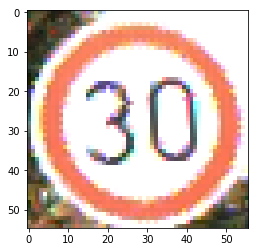

In [25]:
img = io.imread("img/00001_01.ppm")
plt.imshow(img)

In [23]:
img.shape

(55, 56, 3)

Y con un total de 42 Clases como se observa en el archivo `class.csv`

In [5]:
class_name = pd.read_csv("images/class.csv")
class_name.head()

,classID,className
0,0,speed limit 20 (prohibitory)
1,1,speed limit 30 (prohibitory)
2,2,speed limit 50 (prohibitory)
3,3,speed limit 60 (prohibitory)
4,4,speed limit 70 (prohibitory)


cada imagen del directorio `images/` tiene una clase y otros parametros asignados.

In [2]:
target_train = pd.read_csv("images/target_train.csv")

target_train.head()

,imgName,classID
0,0000000.ppm,0
1,0000001.ppm,0
2,0000002.ppm,0
3,0100000.ppm,1
4,0100001.ppm,1


In [3]:
target_test = pd.read_csv("images/target_test.csv")
target_test.head()

,imgName,classID
0,0000003.ppm,0
1,0100063.ppm,1
2,0100064.ppm,1
3,0100065.ppm,1
4,0100066.ppm,1


como por ejemplo la imagen de ahi arriba

In [67]:
target.query("Img_num == '00001.ppm'").query("classID == 1")

,Img_num,classID
5,00001.ppm,1


## ¿Cual es el tamaño de las imagenes?

## Division en Train y Test

In [96]:
print("Division en Train y Test sin tener en cuenta las clases")
print("Total imagenes: ", len(target))
print("80%:",round(len(target)*0.8))
print("20%:",round(len(target)*0.2))
print("100%:",round(len(target)*0.8)+round(len(target)*0.2))

Division en Train y Test sin tener en cuenta las clases
Total imagenes:  1213
80%: 970
20%: 243
100%: 1213


In [85]:
path_dataset = "./images/FullIJCNN2013.zip"
print("CLASS_ID","80% COUNT", "20% COUNT", "TOTAL COUNT", "100% COUNT", "¿TOTAL == 100%?")
for tag in range(43):
    if tag < 10:
        tag = "0"+str(tag)
    
    images = len(os.listdir(path_dataset[:-4]+"/"+str(tag)+"/"))
    per_80 = round(images*0.8)
    per_20 = round(images*0.2)
    if(per_20) == 0:
        per_80 = 1
        per_20 = 1
    print(tag, per_80, per_20, images, sum([per_80, per_20]), images==sum([per_80, per_20]))
    

CLASS_ID 80% COUNT 20% COUNT TOTAL COUNT 100% COUNT ¿TOTAL == 100%?
00 3 1 4 4 True
01 63 16 79 79 True
02 65 16 81 81 True
03 24 6 30 30 True
04 54 14 68 68 True
05 42 11 53 53 True
06 15 4 19 19 True
07 33 8 41 41 True
08 46 11 57 57 True
09 33 8 41 41 True
10 64 16 80 80 True
11 30 8 38 38 True
12 68 17 85 85 True
13 66 17 83 83 True
14 26 6 32 32 True
15 12 3 15 15 True
16 6 2 8 8 True
17 23 6 29 29 True
18 30 8 38 38 True
19 1 1 2 2 True
20 7 2 9 9 True
21 4 1 5 5 True
22 10 3 13 13 True
23 16 4 20 20 True
24 4 1 5 5 True
25 25 6 31 31 True
26 14 4 18 18 True
27 2 1 3 3 True
28 11 3 14 14 True
29 4 1 5 5 True
30 13 3 16 16 True
31 1 1 2 2 True
32 6 2 8 8 True
33 13 3 16 16 True
34 10 2 12 12 True
35 16 4 20 20 True
36 7 2 9 9 True
37 1 1 2 2 True
38 70 18 88 88 True
39 5 1 6 6 True
40 8 2 10 10 True
41 6 1 7 7 True
42 9 2 11 11 True


In [97]:
print("Division en Train y Test teniendo en cuenta las clases")
print("Total imagenes: ", len(target))
print("80%:",len(os.listdir("./images/train/")))
print("20%:",len(os.listdir("./images/test/")))
print("100%:",len(os.listdir("./images/train/"))+len(os.listdir("./images/test/")))


Division en Train y Test teniendo en cuenta las clases
Total imagenes:  1213
80%: 966
20%: 247
100%: 1213


### logistic regression model using scikit-learn

Nota, como son imagenes de distintos tamaños lo que opino que se debe realizar es una extraccion de caracteristicas como el histograma y ahi si entrenar con estas imagenes

In [ ]:
def load_dataset()

In [30]:
train = []
PATH_TRAIN = "./images/train/"
train_dir_list = os.listdir(PATH_TRAIN)
for i in train_dir_list:
    img = io.imread(PATH_TRAIN+i)
    print(img.shape)

(30, 30, 3)
(26, 27, 3)
(65, 65, 3)
(61, 51, 3)
(55, 56, 3)
(80, 77, 3)
(41, 40, 3)
(32, 32, 3)
(50, 47, 3)
(29, 29, 3)
(30, 30, 3)
(40, 36, 3)
(51, 44, 3)
(21, 22, 3)
(41, 40, 3)
(28, 28, 3)
(26, 26, 3)
(27, 27, 3)
(67, 66, 3)
(59, 60, 3)
(30, 31, 3)
(20, 18, 3)
(35, 35, 3)
(20, 20, 3)
(51, 51, 3)
(62, 61, 3)
(22, 21, 3)
(92, 89, 3)
(62, 61, 3)
(42, 42, 3)
(37, 38, 3)
(41, 43, 3)
(66, 55, 3)
(67, 69, 3)
(67, 69, 3)
(62, 62, 3)
(34, 33, 3)
(29, 29, 3)
(38, 38, 3)
(64, 65, 3)
(29, 29, 3)
(20, 21, 3)
(33, 33, 3)
(47, 47, 3)
(46, 46, 3)
(23, 23, 3)
(35, 34, 3)
(26, 26, 3)
(25, 25, 3)
(96, 99, 3)
(21, 19, 3)
(46, 47, 3)
(41, 40, 3)
(57, 57, 3)
(53, 52, 3)
(35, 35, 3)
(55, 54, 3)
(27, 27, 3)
(30, 29, 3)
(31, 30, 3)
(42, 42, 3)
(36, 37, 3)
(32, 34, 3)
(45, 45, 3)
(47, 46, 3)
(32, 32, 3)
(53, 50, 3)
(65, 64, 3)
(27, 27, 3)
(76, 78, 3)
(43, 44, 3)
(56, 56, 3)
(56, 56, 3)
(24, 24, 3)
(62, 62, 3)
(24, 23, 3)
(22, 22, 3)
(21, 22, 3)
(23, 23, 3)
(25, 27, 3)
(103, 107, 3)
(89, 88, 3)
(31, 29, 3)
(3

In [4]:
train_y = []
for i in target_train.values:
    train_y.append(i[1])
len(train_y)

966

In [15]:
with open(PATH_TRAIN+"/target.csv", "w") as target:
    target.write("Img_num,classID\n")
    
    images = os.listdir(PATH_TRAIN)
    
    for img in images:
        target.write(img+","+img[:2]+"\n")
target.close()
#os.rename(path_dataset[:-4]+"/target.csv","./images/target.csv")

In [13]:
"01000"[:2]

'01'

#### Prueba HOG

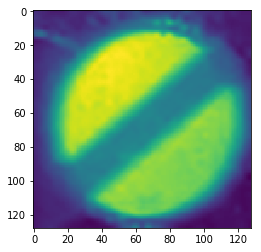

In [5]:
maxsize = (128, 128)
img = Image.open("images/test/3200006.ppm")
tn_image = img.resize(maxsize, Image.ANTIALIAS)
bn = np.mean(tn_image,axis=2)
plt.imshow(bn)

In [6]:
bn.size

16384

In [109]:
fd = hog(bn, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=True)

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [179]:
fd.shape

(512,)

In [44]:
fd, hog_image = hog(bn, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True)

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


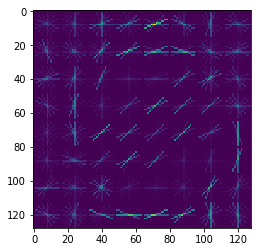

In [45]:
plt.imshow(hog_image)

## Get X y

In [7]:
train_image = []
PATH_TRAIN = "./images/train/"
train_dir_list = os.listdir(PATH_TRAIN)
for i in train_dir_list:
    train_image.append(Image.open(PATH_TRAIN+i).resize(maxsize, Image.ANTIALIAS))

In [8]:
len(train_image)

966

In [9]:
train_main_image = []
for i in train_image:
    train_main_image.append(np.mean(i, axis=2))


In [10]:
len(train_main_image)

966

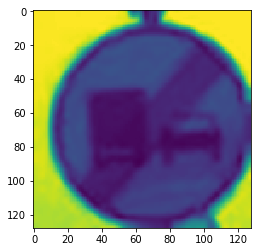

In [11]:
plt.imshow(train_main_image[965])

In [13]:
print(train_y[965])

42


In [ ]:
train_X = []
for i in train_main_image:
    train_X.append(hog(bn, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=True))
    

In [ ]:
len(train_X)

### Logistic Regresssion

In [21]:
from sklearn.linear_model import LogisticRegression

In [180]:
len(train_X[0]), len(train_y)

(512, 966)

In [181]:
lg = LogisticRegression(solver="saga", multi_class="ovr",n_jobs=1)

In [182]:
lg.fit(train_X, train_y)

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
s = np.array(fd)

In [111]:
s = s.reshape(-1,512)
print(s.shape)

(1, 512)


In [183]:
lg.predict(s)

array([38])

### TEST

In [14]:
test_image = []
PATH_TEST = "./images/test/"
train_dir_list = os.listdir(PATH_TEST)
for i in train_dir_list:
    test_image.append(Image.open(PATH_TEST+i).resize(maxsize, Image.ANTIALIAS))

In [15]:
test_main_image = []
for i in test_image:
    test_main_image.append(np.mean(i, axis=2))

In [16]:
test_X = []
for i in test_main_image:
    test_X.append(hog(bn, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), feature_vector=True))

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [24]:
test_y = []
for i in target_test.values:
    test_y.append(i[1])
len(test_y)

247

In [189]:
len(test_X), len(test_y)

(247, 247)

In [190]:
lg.score(test_X, test_y)

0.0728744939271255

### WITH IMAGE ONLY

In [ ]:
x = []
for i in train_main_image:
    x.append(np.array(i).flatten())
len(x[3])

x_1 = []
for i in test_main_image:
    x_1.append(np.array(i).flatten())

In [197]:
lg = LogisticRegression(solver="saga")
lg.fit(x,train_y)

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [198]:
lg.score(x_1, test_y)

0.7732793522267206

### PCA

In [18]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA(n_components=200)
train_X_pca = pca.fit_transform(x)
test_X_pca = pca.fit_transform(x_1)

In [26]:
lg = LogisticRegression()
lg.fit(train_X_pca,train_y)
lg.score(test_X_pca, test_y)

0.04048582995951417

## Histograma por capaz

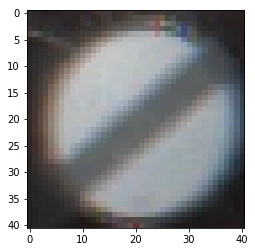

In [17]:
img = io.imread("images/test/3200006.ppm")
plt.imshow(img)

In [18]:
img[:,:,2].shape

(41, 41)

In [37]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

In [40]:
his_R = np.histogram(R)[0]
his_B = np.histogram(B)[0]

In [44]:
list(his_R)+list(his_B)

[163,
 224,
 160,
 167,
 195,
 106,
 110,
 271,
 144,
 141,
 153,
 260,
 132,
 120,
 207,
 105,
 102,
 121,
 270,
 211]

In [48]:
def get_hist_tree_chanel(img):
    image = np.array(img)
    R = image[:,:,0]
    G = image[:,:,1]
    B = image[:,:,2]
    
    hist_R = np.histogram(R)[0]
    hist_G = np.histogram(G)[0]
    hist_B = np.histogram(B)[0]
    
    return list(hist_R)+list(hist_G)+list(hist_B)
    

In [49]:
get_hist_tree_chanel(img)

[163,
 224,
 160,
 167,
 195,
 106,
 110,
 271,
 144,
 141,
 195,
 217,
 149,
 109,
 223,
 106,
 104,
 176,
 213,
 189,
 153,
 260,
 132,
 120,
 207,
 105,
 102,
 121,
 270,
 211]

In [51]:
train_RGB_hist = []
for i in train_image:
    train_RGB_hist.append(get_hist_tree_chanel(i))
    
test_RGB_hist = []
for i in test_image:
    test_RGB_hist.append(get_hist_tree_chanel(i))

In [52]:
lg = LogisticRegression()
lg.fit(train_RGB_hist,train_y)
lg.score(test_RGB_hist, test_y)

0.20647773279352227

In [19]:
def get_RGB_flatten(img):
    image = np.array(img)
    R = image[:,:,0].flatten()
    G = image[:,:,1].flatten()
    B = image[:,:,2].flatten()
        
    return list(R)+list(G)+list(B)

In [20]:
get_RGB_flatten(img)

[45,
 43,
 41,
 38,
 39,
 39,
 43,
 46,
 44,
 43,
 44,
 51,
 61,
 67,
 63,
 65,
 55,
 63,
 72,
 74,
 60,
 58,
 63,
 64,
 68,
 67,
 60,
 58,
 65,
 59,
 50,
 48,
 49,
 47,
 46,
 45,
 41,
 44,
 41,
 38,
 37,
 50,
 46,
 42,
 43,
 46,
 44,
 43,
 43,
 44,
 45,
 57,
 55,
 48,
 56,
 64,
 68,
 56,
 64,
 74,
 77,
 82,
 86,
 90,
 99,
 108,
 107,
 67,
 75,
 53,
 54,
 56,
 53,
 44,
 44,
 49,
 43,
 38,
 39,
 40,
 39,
 39,
 49,
 47,
 47,
 47,
 49,
 49,
 43,
 42,
 46,
 48,
 57,
 60,
 50,
 52,
 68,
 73,
 74,
 79,
 86,
 90,
 92,
 98,
 109,
 136,
 130,
 147,
 108,
 93,
 71,
 62,
 64,
 60,
 46,
 41,
 44,
 41,
 36,
 35,
 37,
 38,
 39,
 62,
 52,
 43,
 51,
 46,
 47,
 48,
 46,
 45,
 53,
 54,
 55,
 58,
 67,
 77,
 83,
 89,
 93,
 98,
 102,
 107,
 107,
 108,
 116,
 125,
 99,
 75,
 84,
 94,
 65,
 84,
 72,
 48,
 45,
 43,
 41,
 39,
 37,
 38,
 37,
 37,
 85,
 88,
 66,
 55,
 54,
 46,
 53,
 54,
 55,
 59,
 64,
 69,
 74,
 82,
 101,
 114,
 126,
 139,
 149,
 160,
 164,
 170,
 168,
 181,
 160,
 167,
 125,
 104,
 81,
 70,
 92

### RGB FLATTEN

In [59]:
train_RGB = []
for i in train_image:
    train_RGB.append(get_RGB_flatten(i))
    
test_RGB = []
for i in test_image:
    test_RGB.append(get_RGB_flatten(i))

In [61]:
lg = LogisticRegression(solver="sag")
lg.fit(train_RGB,train_y)
lg.score(test_RGB, test_y)

c:\users\daielchom\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


KeyboardInterrupt: 

### TO CLICK

In [3]:

lg.score(test_RGB, test_y)

0.8704453441295547

In [11]:
help(lg)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solv

In [21]:
from sklearn.externals import joblib
joblib.dump(lg, './models/model1/saved/logistic-Regression-sckit-learn.pkl') 

['./models/model1/saved/logistic-Regression-sckit-learn.pkl']

In [ ]:

clf2.predict(X[0:1])